In [1]:
import tensorflow as tf
from tensorflow import keras
import time
import numpy as np

import matplotlib.pyplot as plt

2023-07-14 09:38:01.202093: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 09:38:06.235907: E itex/core/kernels/xpu_kernel.cc:38] XPU-GPU kernel not supported.
If you need help, create an issue at https://github.com/intel/intel-extension-for-tensorflow/issues


In [2]:
(_, _), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype("float32")/255

In [3]:
import openvino.runtime as ov
core = ov.Core()
compiled_model = core.compile_model("../models/IR_model/saved_model.xml", "AUTO")

In [4]:
infer_request = compiled_model.create_infer_request()

In [5]:
def predict_image(image):
    plt.imshow(image, cmap='gray')
    clothing = {0 : 'T-shirt',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}
    image_array = np.array(np.expand_dims(image, axis=0), dtype=np.float32)
    input_tensor = ov.Tensor(array=image_array, shared_memory=True)
    infer_request.set_input_tensor(input_tensor)
    output = infer_request.infer(input_tensor)
    return clothing[np.argmax(output[0])]

'T-shirt'

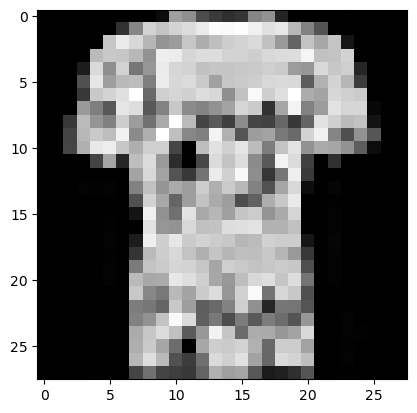

In [11]:
predict_image(test_images[400])